# Project - Wise Athena (Data Analyst)  - M. Rocío Bernal Zamorano

# 1. Importing Libraries and Loading Datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() 

In [2]:
products = pd.read_csv('maestro_productos_prueba.csv')
clients = pd.read_excel('maestro_clientes_prueba.xlsx')
sellout_proveedor1 = pd.read_csv('sellout-proveedor1.csv')
sellout_proveedor2 = pd.read_csv('sellout-proveedor2.csv')
sellin = pd.read_csv('sellin.csv')

# 2. Data Exploration

In [3]:
print('products:', products.shape)
print('clients:', clients.shape)
print('sellout_proveedor1:', sellout_proveedor1.shape)
print('sellout_proveedor2:', sellout_proveedor2.shape)
print('sellin:', sellin.shape)

products: (1242, 4)
clients: (2452, 10)
sellout_proveedor1: (1206365, 5)
sellout_proveedor2: (4862029, 5)
sellin: (4188783, 6)


### 2.1. Products Dataset

In [4]:
products.head()

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
0,11058,Frosted Mango,Sugar-free,Cereal bars
1,29207,Nut Cheerios Mango,Super-flavour,Cereal box
2,38379,MultiGrain Mango,Sugar-free,Cereal bars
3,42671,Crunch Mango,Sugar-free,Cereal bars
4,54644,Corn Mango,Sugar-free,Cereal bars


In [5]:
# Number of unique values in each column:
for i in products.columns: 
    print(i, ':', products[i].nunique())

print('products - total:', products.shape[0])

Sku : 1242
Sku_Description : 1242
Sku_Category : 2
Sku_Subcategory : 3
products - total: 1242


Notice there are not repeated products in the dataset (Sku and products-total = 1242 values). Sku (stock keeping unit) column is the product identifier. 

### 2.2. Clients Dataset

In [6]:
clients.head()

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,2,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4,Funny Sky Blue GipsyTrade,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
2,5,Rare Green Laundrette,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
3,6,Angry Indigo Center,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI
4,7,Tall Violet Deli,proveedor_1,Shop,Rare Orange Applepie,Coalmar,SURESTE,Eioval Aerospace,FORANEO,VI


In [7]:
# Number of unique values in each column:
for i in clients.columns: 
    print(i, ':', clients[i].nunique())
    
print('clients - total:', clients.shape[0])

NUM TDA : 2448
NOMBRE DE TDA : 2389
CADENA : 2
FORMATO : 13
MUNICIPIO/CIUDAD : 623
ESTADO : 32
DIVISION : 11
DEPOSITO / DISTRIBUIDOR : 78
ESTRUCTURA : 3
GRADO : 6
clients - total: 2452


NUM TDA is the identifier of the shop. There are 4 shops repeated in the dataset (clients-total: 2452). These are: 143, 2568, 58, and 240 as we see below:

In [8]:
# Finding the repeated shops:
clients['NUM TDA'].value_counts().head()

143     2
2568    2
58      2
240     2
3563    1
Name: NUM TDA, dtype: int64

In [9]:
# Checking repeated values: 
clients.loc[clients['NUM TDA'] == 143]

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
115,143,Empty Turquoise Baker,proveedor_1,Shop,Clean Aqua Soil,Egusgul,NOROESTE,Gornvalval Industrail,DISTRIBUIDORES,IV
235,143,Empty Turquoise Baker,proveedor_1,Shop,Clean Aqua Soil,Nabargus,OCCIDENTE,Colorvit Ifonforge Industries,FORANEO,III


In [10]:
# Checking repeated values: 
clients.loc[clients['NUM TDA'] == 2568]

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
2409,2568,Impressive Coral BigCom,proveedor_2,Grocery,First Yellow Tower,Mobartho,PENÍNSULA,Valarar Toughworks,FORANEO,VI
2422,2568,Impressive Coral BigCom,proveedor_2,Grocery,Legendary Azure Tree,Mobartho,PENÍNSULA,Valarar Toughworks,FORANEO,VI


In [11]:
# Checking repeated values: 
clients.loc[clients['NUM TDA'] == 58]

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
50,58,Aquamarine Florist,proveedor_1,Shop,Singing Violet Soil,Mamoval,PENÍNSULA,Rodalgus Toughworks,DISTRIBUIDORES,VI
2415,58,Aquamarine Florist,proveedor_2,AllInOne,Young Chocolate Burgo,Marcotho,BAJÍO,Marodio Vocals,FORANEO,III


In [12]:
# Checking repeated values: 
clients.loc[clients['NUM TDA'] == 240]

,NUM TDA,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
151,240,Dull Navy BookShop,proveedor_1,Shop,Rare Lemon Key,Alloralf,METRO-SUR,Thrilthoal Empire,METRO,IV
2430,240,Dull Navy BookShop,proveedor_2,TinyShop,Rare Lemon Key,Alloralf,METRO-NORTE,Lorthogus Toughworks,METRO,IV


All the repeated shops differ in the values for other columns (for example they differ in the supplier, format, location, etc.), so they are actually different shops (although with the same name, so they belong to the same company) and they should have a different ID.

In [13]:
# Checking the first 50 unique values for NUM TDA so we can assign new IDs to the repeated shops
clients['NUM TDA'].unique()[0:50]

array([ 2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 38,
       39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56],
      dtype=int64)

In [14]:
# Assigning new ID to the repeated shops
clients.at[2430,'NUM TDA']=1
clients.at[2415,'NUM TDA']=3
clients.at[2422,'NUM TDA']=34
clients.at[235,'NUM TDA']=35

# Check that the ID of the shop is unique (not repeated values)
clients['NUM TDA'].nunique()/clients.shape[0]

1.0

### 2.3. Sellout_proveedor1 Dataset

In [15]:
sellout_proveedor1.head()

,Sku,Date,Store_Id,Units,Price
0,4220015,2017-01-01 SO Diaria Piezas,18,6.0,15.6
1,4220015,2017-01-01 SO Diaria Piezas,24,0.0,0.0
2,4220015,2017-01-01 SO Diaria Piezas,39,0.0,0.0
3,4220015,2017-01-01 SO Diaria Piezas,44,0.0,0.0
4,4220015,2017-01-01 SO Diaria Piezas,46,0.0,0.0


We can see that we have the same product sold during the same day but at different shops.

In [16]:
# Number of unique values in each column:
for i in sellout_proveedor1.columns: 
    print(i, ':', sellout_proveedor1[i].nunique())

Sku : 43
Date : 155
Store_Id : 241
Units : 2166
Price : 6946


### 2.4. Sellout_proveedor2 Dataset

In [17]:
sellout_proveedor2.head()

,Sku,Date,Store_Id,Pieces,Price
0,4240039,2016/01/01,1000,23.0,$16.00
1,4240039,2016/01/01,1001,116.0,$16.00
2,4240039,2016/01/01,1002,146.0,$16.00
3,4240039,2016/01/01,1003,17.0,$16.80
4,4240039,2016/01/01,1004,5.0,$16.70


We can see that we have the same product sold during the same day but at different shops.

In [18]:
# Number of unique values in each column:
for i in sellout_proveedor2.columns: 
    print(i, ':', sellout_proveedor2[i].nunique())

Sku : 33
Date : 242
Store_Id : 2085
Pieces : 3101
Price : 3401


In [19]:
# Rename the Pieces column to be consistent with the sellout_proveedor1 dataset (Units column)
sellout_proveedor2.rename(columns = {"Pieces":"Units"}, inplace = True)

### 2.5. Sellin Dataset

In [20]:
sellin.head()

,Sku,Date,Store_Id,Pieces,Price,Margin
0,4220015,02/01/2015,100,20.0,13.01,9.78
1,4220015,02/01/2015,116,20.0,13.01,9.78
2,4220015,02/01/2015,141,80.0,13.01,9.78
3,4220015,02/01/2015,146,10.0,13.01,9.78
4,4220015,02/01/2015,151,20.0,13.09,9.87


We can see that we have the same product sold during the same day but at different shops.

In [21]:
# Number of unique values in each column:
for i in sellin.columns: 
    print(i, ':', sellin[i].nunique())

Sku : 34
Date : 757
Store_Id : 1624
Pieces : 3833
Price : 279
Margin : 483


# 3. Data Merging 

We combine the previous 5 datasets into 2: sellout and sellin, containing the information stored in products and clients.

### 3.1. Sellout Dataset

In [22]:
# Concat dataframes of sellout for the 2 different suppliers
sellout_proveedor1['Supplier'] = 1
sellout_proveedor2['Supplier'] = 2

sellout = pd.concat([sellout_proveedor1, sellout_proveedor2])
sellout.head()

,Sku,Date,Store_Id,Units,Price,Supplier
0,4220015,2017-01-01 SO Diaria Piezas,18,6.0,15.6,1
1,4220015,2017-01-01 SO Diaria Piezas,24,0.0,0,1
2,4220015,2017-01-01 SO Diaria Piezas,39,0.0,0,1
3,4220015,2017-01-01 SO Diaria Piezas,44,0.0,0,1
4,4220015,2017-01-01 SO Diaria Piezas,46,0.0,0,1


In [23]:
# Merge the sellout and products dataframes. Ordering first the values by 'Sku'. 
sellout.sort_values(by=['Sku'], inplace=True)

sellout = pd.merge_asof(sellout, products, on='Sku')
sellout.head(2)

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory
0,5027,2017-01-01 SO Diaria Piezas,41,0.0,0,1,NaN,NaN,NaN
1,5027,2017-04-17 SO Diaria Piezas,41,0.0,0,1,NaN,NaN,NaN


We can see that there are some products in the sellout dataframe that are not contained in the products dataframe. We will deal with missing values in the cleaning section (section 4).

In [24]:
products.loc[(products['Sku']==5027)]

,Sku,Sku_Description,Sku_Category,Sku_Subcategory


In [25]:
sellout.tail(2)

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory
6068392,4829827,2017-02-21 SO Diaria Piezas,251,0.0,0,1,Golden Goals Chocolate Choc Chip,Sugar-free,Cereal bars
6068393,4829827,2017-06-04 SO Diaria Piezas,708,0.0,0,1,Golden Goals Chocolate Choc Chip,Sugar-free,Cereal bars


In [26]:
products.loc[(products['Sku']==4829827)]

,Sku,Sku_Description,Sku_Category,Sku_Subcategory
481,4829827,Golden Goals Chocolate Choc Chip,Sugar-free,Cereal bars


In [27]:
# Merge the sellout and clients dataframes. Ordering first the values by 'Store_Id'. 
clients.rename(columns = {"NUM TDA":"Store_Id"}, inplace = True)
clients.sort_values(by=['Store_Id'], inplace=True)
sellout.sort_values(by=['Store_Id'], inplace=True)

sellout = pd.merge_asof(sellout, clients, on='Store_Id')
sellout.head(2)

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,4665676,2017-02-08 SO Diaria Piezas,2,0.0,0,1,Crunch Chocolate Choc Chip,Super-flavour,Cereal box,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4697052,2017-01-03 SO Diaria Piezas,2,0.0,0,1,Sugar Chocolate Choc Chip,Super-flavour,Cereal box,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI


### 3.2. Sellin Dataset

In [28]:
sellin.head()

,Sku,Date,Store_Id,Pieces,Price,Margin
0,4220015,02/01/2015,100,20.0,13.01,9.78
1,4220015,02/01/2015,116,20.0,13.01,9.78
2,4220015,02/01/2015,141,80.0,13.01,9.78
3,4220015,02/01/2015,146,10.0,13.01,9.78
4,4220015,02/01/2015,151,20.0,13.09,9.87


In [29]:
# Rename the Pieces column to be consistent with the sellout dataset (Units column)
sellin.rename(columns = {"Pieces":"Units"}, inplace = True)

In [30]:
# Merge the sellin and products dataframes. Ordering first the values by 'Sku'. 
sellin.sort_values(by=['Sku'], inplace=True)

sellin = pd.merge_asof(sellin, products, on='Sku')
sellin.head(2)

,Sku,Date,Store_Id,Units,Price,Margin,Sku_Description,Sku_Category,Sku_Subcategory
0,4220015,02/01/2015,100,20.0,13.01,9.78,Stars Chocolate,Sugar-free,Cereal bars
1,4220015,01/08/2016,3156,5.0,12.86,9.03,Stars Chocolate,Sugar-free,Cereal bars


In [31]:
# Merge the sellin and clients dataframes. Ordering first the values by 'Store_Id'. 
sellin.sort_values(by=['Store_Id'], inplace=True)

sellin = pd.merge_asof(sellin, clients, on='Store_Id')
sellin.head(2)

,Sku,Date,Store_Id,Units,Price,Margin,Sku_Description,Sku_Category,Sku_Subcategory,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,4260053,13/09/2016,2,300.0,13.64,9.57,Grain Chocolate,Sugar-free,Cereal bars,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI
1,4819810,12/05/2015,2,13.5,19.01,13.70,Fruit & Nut Chocolate Choc Chip,Sugar-free,Cereal bars,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI


### 3.3. Final Data Structure

In [32]:
# We have merged the 5 datasets into these 2:
print('sellin:', sellin.shape)
print('sellout:', sellout.shape)
print('')
print('sellin:', sellin.columns)
print('sellout:', sellout.columns)

sellin: (4188783, 18)
sellout: (6068394, 18)

sellin: Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Margin',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'NOMBRE DE TDA',
       'CADENA', 'FORMATO', 'MUNICIPIO/CIUDAD', 'ESTADO', 'DIVISION',
       'DEPOSITO / DISTRIBUIDOR', 'ESTRUCTURA', 'GRADO'],
      dtype='object')
sellout: Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Supplier',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'NOMBRE DE TDA',
       'CADENA', 'FORMATO', 'MUNICIPIO/CIUDAD', 'ESTADO', 'DIVISION',
       'DEPOSITO / DISTRIBUIDOR', 'ESTRUCTURA', 'GRADO'],
      dtype='object')


Comments: it was not possible to merge these 2 dataframes into 1 due to laptop memory problems.

# 4. Data Cleaning & Preprocessing

## 4.1. Missing data 

In [33]:
# Checking number of NaN values in the dataset:
print('NaN in sellin:', sellin.isnull().sum().sum())

NaN in sellin: 0


In [34]:
# Checking number of NaN values in the dataset:
print('NaN in sellout:', sellout.isnull().sum().sum())

NaN in sellout: 1395


In [35]:
# NaN in every column of the sellout dataset:
print(sellout.isnull().sum())

Sku                          0
Date                         0
Store_Id                     0
Units                        0
Price                        0
Supplier                     0
Sku_Description            465
Sku_Category               465
Sku_Subcategory            465
NOMBRE DE TDA                0
CADENA                       0
FORMATO                      0
MUNICIPIO/CIUDAD             0
ESTADO                       0
DIVISION                     0
DEPOSITO / DISTRIBUIDOR      0
ESTRUCTURA                   0
GRADO                        0
dtype: int64


In [36]:
# Remove the NaN values, since we don't have the description of these products.
sellout = sellout.dropna()
print('NaN in sellout:', sellout.isnull().sum().sum())

NaN in sellout: 0


## 4.2. Duplicated data 

We can see that Supplier and CADENA columns in the sellout dataframe have the same information (supplier 1 & 2).

In [37]:
sellout.head(1)

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory,NOMBRE DE TDA,CADENA,FORMATO,MUNICIPIO/CIUDAD,ESTADO,DIVISION,DEPOSITO / DISTRIBUIDOR,ESTRUCTURA,GRADO
0,4665676,2017-02-08 SO Diaria Piezas,2,0.0,0,1,Crunch Chocolate Choc Chip,Super-flavour,Cereal box,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI


In [38]:
print('Supplier:', sellout['Supplier'].unique())
print('CADENA:', sellout['CADENA'].unique())

Supplier: [1 2]
CADENA: ['proveedor_1' 'proveedor_2']


In [39]:
# Replace 'proveedor_1' to 1 and convert to int type (same for proveedor_2)
sellout['CADENA'] = sellout['CADENA'].str.replace('proveedor_1','1').replace('proveedor_2','2')
sellout['CADENA'] = sellout['CADENA'].astype(int)

sellout['CADENA'].unique()

array([1, 2])

In [40]:
# Compare the 2 columns (Supplier, CADENA) to check if there is some inconsistency
sellout['Supplier'].equals(sellout['CADENA'])

False

We cannot, therefore, remove the CADENA column, since it is not the same than the Supplier column. We look at the data types, in case that they are different:

In [41]:
sellout.dtypes

Sku                          int64
Date                        object
Store_Id                     int64
Units                      float64
Price                       object
Supplier                     int64
Sku_Description             object
Sku_Category                object
Sku_Subcategory             object
NOMBRE DE TDA               object
CADENA                       int32
FORMATO                     object
MUNICIPIO/CIUDAD            object
ESTADO                      object
DIVISION                    object
DEPOSITO / DISTRIBUIDOR     object
ESTRUCTURA                  object
GRADO                       object
dtype: object

In [42]:
# Changing to int data type
sellout['CADENA'] = sellout['CADENA'].astype(int)

In [43]:
sellout['CADENA'].unique()

array([1, 2])

In [44]:
sellout['Supplier'].unique()

array([1, 2], dtype=int64)

In [45]:
sellout['Supplier'].equals(sellout['CADENA'])

False

Since they are still not the same, we should ask the company.

## 4.3. Inconsistent data

### 4.3.1. Columns names

In [46]:
sellin.columns

Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Margin',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'NOMBRE DE TDA',
       'CADENA', 'FORMATO', 'MUNICIPIO/CIUDAD', 'ESTADO', 'DIVISION',
       'DEPOSITO / DISTRIBUIDOR', 'ESTRUCTURA', 'GRADO'],
      dtype='object')

In [47]:
# Rename the columns
sellin.rename(columns = {"NOMBRE DE TDA":"Store_Name","CADENA":"Store_Supplier", "FORMATO":"Store_Type", 
                         "MUNICIPIO/CIUDAD":"Store_City", "ESTADO":"Store_State", "DIVISION":"Store_Division", 
                         "DEPOSITO / DISTRIBUIDOR":"Store_Distributor", "ESTRUCTURA":"Store_Structure", 
                         "GRADO":"Store_Degree"}, inplace = True)
sellin.columns

Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Margin',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'Store_Name',
       'Store_Supplier', 'Store_Type', 'Store_City', 'Store_State',
       'Store_Division', 'Store_Distributor', 'Store_Structure',
       'Store_Degree'],
      dtype='object')

In [48]:
sellout.columns

Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Supplier',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'NOMBRE DE TDA',
       'CADENA', 'FORMATO', 'MUNICIPIO/CIUDAD', 'ESTADO', 'DIVISION',
       'DEPOSITO / DISTRIBUIDOR', 'ESTRUCTURA', 'GRADO'],
      dtype='object')

In [49]:
# Rename the columns
sellout.rename(columns = {"NOMBRE DE TDA":"Store_Name","CADENA":"Store_Supplier", "FORMATO":"Store_Type", 
                         "MUNICIPIO/CIUDAD":"Store_City", "ESTADO":"Store_State", "DIVISION":"Store_Division", 
                         "DEPOSITO / DISTRIBUIDOR":"Store_Distributor", "ESTRUCTURA":"Store_Structure", 
                         "GRADO":"Store_Degree"}, inplace = True)
sellout.columns

Index(['Sku', 'Date', 'Store_Id', 'Units', 'Price', 'Supplier',
       'Sku_Description', 'Sku_Category', 'Sku_Subcategory', 'Store_Name',
       'Store_Supplier', 'Store_Type', 'Store_City', 'Store_State',
       'Store_Division', 'Store_Distributor', 'Store_Structure',
       'Store_Degree'],
      dtype='object')

### 4.3.2. Text (capitalization and spaces)

In [50]:
sellin.head(1)

,Sku,Date,Store_Id,Units,Price,Margin,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Store_Supplier,Store_Type,Store_City,Store_State,Store_Division,Store_Distributor,Store_Structure,Store_Degree
0,4260053,13/09/2016,2,300.0,13.64,9.57,Grain Chocolate,Sugar-free,Cereal bars,Bloody Sea Green BookShop,proveedor_1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI


In [51]:
sellout.head(1)

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Store_Supplier,Store_Type,Store_City,Store_State,Store_Division,Store_Distributor,Store_Structure,Store_Degree
0,4665676,2017-02-08 SO Diaria Piezas,2,0.0,0,1,Crunch Chocolate Choc Chip,Super-flavour,Cereal box,Bloody Sea Green BookShop,1,Shop,Bizarre White Shop,Coalmar,SURESTE,Mogulval Corp.,DISTRIBUIDORES,VI


In [52]:
print(sorted(sellout['Sku_Description'].unique()))
print('')
print(sorted(sellin['Sku_Description'].unique()))

['Chocos Chocolate Choc Chip', 'Chocos Mango Peach', 'Coco Poops Chocolate Choc Chip', 'Coco Poops Mango Peach', 'Cookies Chocolate Choc Chip', 'Corn Chocolate Choc Chip', 'Cornflakes Chocolate Choc Chip', 'Cornflakes Mango Peach', 'Crisp Mango Peach', 'Crispy Rice Chocolate Choc Chip', 'Crispy Rice Mango Peach', 'Crunch Berries Chocolate Choc Chip', 'Crunch Berries Mango Peach', 'Crunch Chocolate Choc Chip', 'Crunch Life Chocolate', 'Crunch Mango Peach', 'Crunchy Bran Chocolate Choc Chip', 'Crunchy Bran Mango Peach', 'Crunchy Nut Cornflakes Chocolate Choc Chip', 'Cups Mango Peach', 'Frosted Chocolate Choc Chip', 'Frosted Mango Peach', 'Fruit & Bran Chocolate Choc Chip', 'Fruit & Bran Mango Peach', 'Fruit & Nut Chocolate Choc Chip', 'Golden Goals Chocolate Choc Chip', 'Graham Chocolate Choc Chip', 'Graham Mango Peach', 'Grain Chocolate', 'Grape-Nuts Mango Peach', 'Lucjy Charms Chocolate', 'Lucjy Charms Mango Peach', 'Muesli Chocolate', 'Muesli Mango Peach', 'MultiGrain Chocolate Choc C

In [53]:
print(sellout['Sku_Category'].unique())
print(sellin['Sku_Category'].unique())

['Super-flavour' 'Sugar-free']
['Sugar-free' 'Super-flavour']


In [54]:
print(sellout['Sku_Subcategory'].unique())
print(sellin['Sku_Subcategory'].unique())

['Cereal box' 'Cereal bars']
['Cereal bars' 'Cereal box']


In [55]:
print(sorted(sellout['Store_Name'].unique())[0:5])

[' Aqua Chemist', ' Aquamarine Florist', ' Azure Baker', ' Azure Chemist', ' Azure Leftorium']


We see unwanted spaces at the begining of the string, such as in ' Aqua Chemist'

In [56]:
sellout['Store_Type'].unique()

array(['Shop', 'GreatShop', 'AllInOne', 'Mall', 'Grocery', 'Leftorium',
       'GipsyTrade', 'SmallShop', 'TinyShop', 'BigCom'], dtype=object)

In [57]:
print(sorted(sellout['Store_City'].unique())[0:5])

[' Beige Castle', ' Burgundy Polis', ' Burgundy Town', ' Chartreuse Creek', ' Cyan Star']


In [58]:
print(sorted(sellout['Store_State'].unique()))
print('')
print(sorted(sellin['Store_State'].unique()))

['Alflorval', 'Alfrusma', 'Alfthrilmad', 'Alloralf', 'Armamo', 'Arrodio', 'Barthovit', 'Coalmar', 'Eemar', 'Egusco', 'Egusgul', 'Emarrus', 'Erodmo', 'Gulalco', 'Gulvitval', 'Lorgornco', 'Lorgornna', 'Lorgulgus', 'Lorthogul', 'Lorvalmo', 'Madgulrus', 'Magornmar', 'Mamoval', 'Marcotho', 'Mobartho', 'Momamo', 'Nabargus', 'Namobar', 'Rodbare', 'Thogulgul', 'Thrilvallor', 'Valargorn']

['Alflorval', 'Alfrusma', 'Alfthrilmad', 'Alloralf', 'Arrodio', 'Barthovit', 'Coalmar', 'Eemar', 'Egusco', 'Egusgul', 'Emarrus', 'Erodmo', 'Gulalco', 'Gulvitval', 'Lorgornco', 'Lorgornna', 'Lorgulgus', 'Lorthogul', 'Lorvalmo', 'Madgulrus', 'Magornmar', 'Mamoval', 'Marcotho', 'Mobartho', 'Momamo', 'Nabargus', 'Namobar', 'Rodbare', 'Thogulgul', 'Thrilvallor', 'Valargorn']


In [59]:
sellout['Store_Division'].unique()

array(['SURESTE', 'SUROESTE', 'PENÍNSULA', 'CENTRO', 'METRO-NORTE',
       'BAJÍO', 'OCCIDENTE', 'CENTRO-SUR', 'METRO-SUR', 'NOROESTE',
       'NORESTE'], dtype=object)

In [60]:
print(sorted(sellout['Store_Distributor'].unique()))

['Alfthrilal Vocals', 'Arbarrus Gmbh', 'Argule Ifonforge Industries', 'Argullor Ifonforge Industries', 'Arthona Vocals', 'Arthotho Industrail', 'Barcorus Vocals', 'Bariolor Industrail', 'Barmadmo Gmbh', 'Barmaralf Inc.', 'Barrusgul Corp.', 'Barthrilal Vocals', 'Colorvit Ifonforge Industries', 'Comarbar Gmbh', 'Eioval Aerospace', 'Elore Toughworks', 'Elortho Aerospace', 'Emolor Vocals', 'Erodmad Industrail', 'Evitrus Inc.', 'Gornalfmo Inc.', 'Gornalfrod Toughworks', 'Gorngornco Ifonforge Industries', 'Gorngusco Toughworks', 'Gornmadvit Industrail', 'Gornmoco Corp.', 'Gornvalval Industrail', 'Gulrodlor Industrail', 'Gusgorne Gmbh', 'Gusmorus Inc.', 'Gusnavit Industrail', 'Ioalfio Ifonforge Industries', 'Ioarco Corp.', 'Lorealf Industrail', 'Lorgornlor Vocals', 'Lorgulbar Inc.', 'Lorloralf Industrail', 'Lorlorval Gmbh', 'Lormarmad Corp.', 'Lorrodthril Corp.', 'Lorthogus Toughworks', 'Lorvalval Inc.', 'Malormad Corp.', 'Mararna Industrail', 'Marodio Vocals', 'Marvitrus Ifonforge Industries

In [61]:
sellout['Store_Structure'].unique()

array(['DISTRIBUIDORES', 'FORANEO', 'METRO'], dtype=object)

In [62]:
# Removing spaces at the beginning and the end of the string
sellin['Store_Name'] = sellin['Store_Name'].str.strip()
sellout['Store_Name'] = sellout['Store_Name'].str.strip()

sellin['Store_City'] = sellin['Store_City'].str.strip()
sellout['Store_City'] = sellout['Store_City'].str.strip()

### 4.3.3. Data Type

In [63]:
sellin.dtypes

Sku                    int64
Date                  object
Store_Id               int64
Units                float64
Price                float64
Margin               float64
Sku_Description       object
Sku_Category          object
Sku_Subcategory       object
Store_Name            object
Store_Supplier        object
Store_Type            object
Store_City            object
Store_State           object
Store_Division        object
Store_Distributor     object
Store_Structure       object
Store_Degree          object
dtype: object

In [64]:
sellout.dtypes

Sku                    int64
Date                  object
Store_Id               int64
Units                float64
Price                 object
Supplier               int64
Sku_Description       object
Sku_Category          object
Sku_Subcategory       object
Store_Name            object
Store_Supplier         int32
Store_Type            object
Store_City            object
Store_State           object
Store_Division        object
Store_Distributor     object
Store_Structure       object
Store_Degree          object
dtype: object

#### 4.3.2.1. Date

In [65]:
sellout['Date'].unique()

array(['2017-02-08 SO Diaria Piezas', '2017-01-03 SO Diaria Piezas',
       '2017-04-25 SO Diaria Piezas', '2017-02-22 SO Diaria Piezas',
       '2017-04-16 SO Diaria Piezas', '2017-05-14 SO Diaria Piezas',
       '2017-05-30 SO Diaria Piezas', '2017-04-11 SO Diaria Piezas',
       '2017-05-04 SO Diaria Piezas', '2017-03-29 SO Diaria Piezas',
       '2017-05-20 SO Diaria Piezas', '2017-06-02 SO Diaria Piezas',
       '2017-02-15 SO Diaria Piezas', '2017-05-25 SO Diaria Piezas',
       '2017-04-18 SO Diaria Piezas', '2017-04-29 SO Diaria Piezas',
       '2017-02-16 SO Diaria Piezas', '2017-03-30 SO Diaria Piezas',
       '2017-02-02 SO Diaria Piezas', '2017-05-03 SO Diaria Piezas',
       '2017-04-10 SO Diaria Piezas', '2017-03-27 SO Diaria Piezas',
       '2017-02-14 SO Diaria Piezas', '2017-05-13 SO Diaria Piezas',
       '2017-03-24 SO Diaria Piezas', '2017-03-14 SO Diaria Piezas',
       '2017-03-16 SO Diaria Piezas', '2017-01-31 SO Diaria Piezas',
       '2017-01-23 SO Diaria Pieza

In [66]:
# Date in sellout

# Remove "SO Diaria Piezas" from the Date column
sellout['Date'] = sellout['Date'].str.replace(' SO Diaria Piezas','')

# Replace "/" to "-"
sellout['Date'] = sellout['Date'].str.replace('/','-')

# Convert the Date column into Datetime format
sellout['Date'] = pd.to_datetime(sellout['Date'], format="%Y/%m/%d")

In [67]:
sellin['Date'].unique()

array(['13/09/2016', '12/05/2015', '30/11/2015', '07/06/2016',
       '22/09/2015', '30/06/2015', '27/10/2015', '22/12/2015',
       '17/03/2015', '17/10/2016', '21/12/2015', '02/01/2017',
       '03/03/2015', '01/03/2016', '06/09/2016', '12/01/2016',
       '08/09/2015', '04/01/2016', '15/09/2015', '01/06/2015',
       '21/09/2015', '28/07/2015', '23/02/2015', '09/05/2016',
       '23/03/2015', '11/01/2016', '29/09/2015', '11/08/2015',
       '13/10/2015', '24/02/2015', '13/04/2015', '31/08/2015',
       '06/05/2017', '24/01/2017', '12/10/2015', '16/05/2016',
       '30/05/2016', '17/12/2016', '14/01/2017', '02/08/2016',
       '07/09/2015', '12/09/2016', '09/12/2015', '06/10/2015',
       '12/01/2015', '23/02/2016', '25/05/2015', '29/11/2016',
       '30/07/2016', '13/12/2016', '06/07/2015', '22/06/2015',
       '27/12/2016', '08/09/2016', '06/01/2016', '11/10/2016',
       '03/05/2016', '14/12/2015', '18/01/2016', '09/03/2015',
       '01/11/2016', '19/01/2015', '26/11/2016', '07/07

In [68]:
# Date in sellin

# Replace "/" to "-"
sellin['Date'] = sellin['Date'].str.replace('/','-')

# Convert the Date column into Datetime format
sellin['Date'] = pd.to_datetime(sellin['Date'], format="%d-%m-%Y")

In [69]:
print(sellin['Date'].dtypes)
print(sellout['Date'].dtypes)

datetime64[ns]
datetime64[ns]


#### 4.3.2.1. Numeric

In [70]:
# GRADO is an object type that contains roman numerals
sellin['Store_Degree'].unique()

array(['VI', 'II', 'IV', 'III', 'V', 'I'], dtype=object)

In [71]:
# Change roman numerals in GRADO to numbers:
sellin['Store_Degree'] = sellin['Store_Degree'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})
sellout['Store_Degree'] = sellout['Store_Degree'].map({'I': 1, 'II': 2, 'III': 3, 'IV': 4, 'V': 5, 'VI': 6})

In [72]:
print(sellin['Store_Degree'].dtypes)
print(sellout['Store_Degree'].dtypes)

int64
int64


In [73]:
sellout['Price'].unique()

array([0.0, 15.3, 13.4, ..., '$42.51', '$43.63', '$45.12'], dtype=object)

In [74]:
# Remove the $ symbol from the Price column
sellout['Price'] = sellout['Price'].str.replace('$','')

# Change Price column to float
sellout['Price'] = sellout['Price'].astype(float)

In [75]:
sellin['Units'].unique()

array([300. ,  13.5, 720. , ...,  85.2, 242.1, 101.8])

In [76]:
sellout['Units'].unique()

array([   0. ,   10. ,   18. , ..., 1929. , 1686. ,   -3.5])

In [77]:
# Change Units column to integer. 
# Use rounding before (round to the rise with "ceil").

import math

sellin['Units'] = sellin['Units'].apply(np.ceil)
sellout['Units'] = sellout['Units'].apply(np.ceil)

sellin['Units'] = sellin['Units'].astype(int)
sellout['Units'] = sellout['Units'].astype(int)

In [78]:
sellin.dtypes

Sku                           int64
Date                 datetime64[ns]
Store_Id                      int64
Units                         int32
Price                       float64
Margin                      float64
Sku_Description              object
Sku_Category                 object
Sku_Subcategory              object
Store_Name                   object
Store_Supplier               object
Store_Type                   object
Store_City                   object
Store_State                  object
Store_Division               object
Store_Distributor            object
Store_Structure              object
Store_Degree                  int64
dtype: object

In [79]:
sellout.dtypes

Sku                           int64
Date                 datetime64[ns]
Store_Id                      int64
Units                         int32
Price                       float64
Supplier                      int64
Sku_Description              object
Sku_Category                 object
Sku_Subcategory              object
Store_Name                   object
Store_Supplier                int32
Store_Type                   object
Store_City                   object
Store_State                  object
Store_Division               object
Store_Distributor            object
Store_Structure              object
Store_Degree                  int64
dtype: object

## 4.4. Outliers

### 4.4.1. Categorical features

<AxesSubplot:>

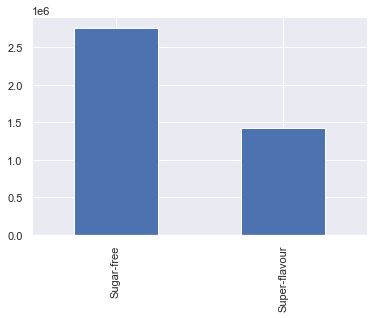

In [80]:
sellin['Sku_Category'].value_counts().plot.bar()

<AxesSubplot:>

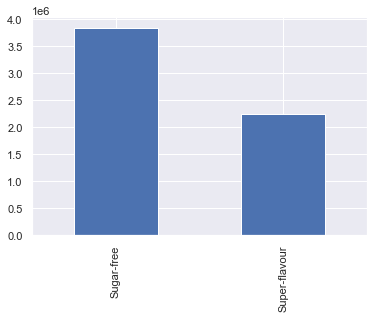

In [81]:
sellout['Sku_Category'].value_counts().plot.bar()

<AxesSubplot:>

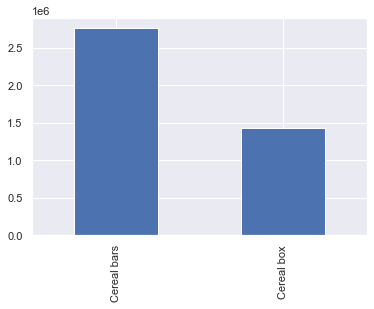

In [82]:
sellin['Sku_Subcategory'].value_counts().plot.bar()

<AxesSubplot:>

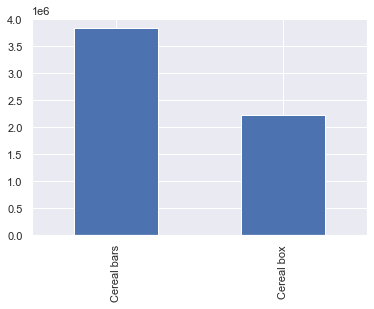

In [83]:
sellout['Sku_Subcategory'].value_counts().plot.bar()

<AxesSubplot:>

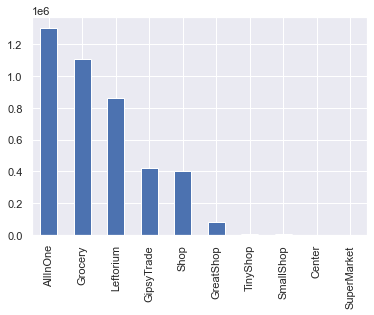

In [84]:
sellin['Store_Type'].value_counts().plot.bar()

In [85]:
sellin['Store_Type'].value_counts()

AllInOne       1304592
Grocery        1110727
Leftorium       861306
GipsyTrade      419712
Shop            400043
GreatShop        80595
TinyShop          6102
SmallShop         5271
Center             382
SuperMarket         53
Name: Store_Type, dtype: int64

<AxesSubplot:>

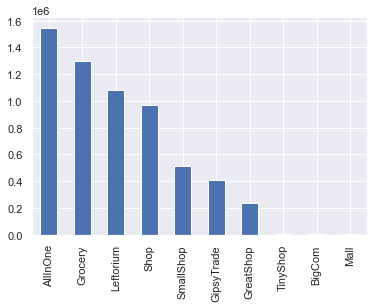

In [86]:
sellout['Store_Type'].value_counts().plot.bar()

In [87]:
sellout['Store_Type'].value_counts()

AllInOne      1547394
Grocery       1298112
Leftorium     1084113
Shop           970233
SmallShop      511631
GipsyTrade     406749
GreatShop      233120
TinyShop         8495
BigCom           4362
Mall             3720
Name: Store_Type, dtype: int64

We have very few observations for the TinyShop, SmallShop, Center, and SuperMarket in the sellin dataframe, and for the TinyShop, BigCom, and Mall in the sellout dataframe. I will keep these data because it is still informative.

<AxesSubplot:>

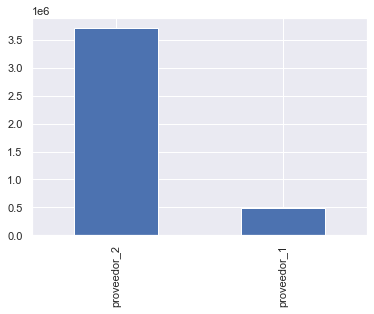

In [88]:
sellin['Store_Supplier'].value_counts().plot.bar()

<AxesSubplot:>

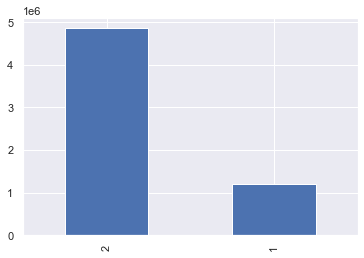

In [89]:
sellout['Store_Supplier'].value_counts().plot.bar()

Although there is more data for the supplier 2 than for 1, I will keep all the data because it is still informative.

<AxesSubplot:>

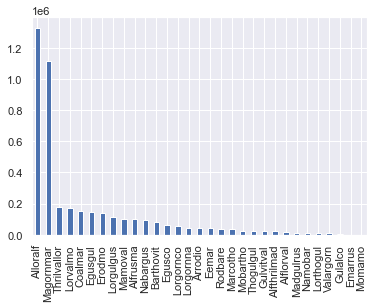

In [90]:
sellin['Store_State'].value_counts().plot.bar()

<AxesSubplot:>

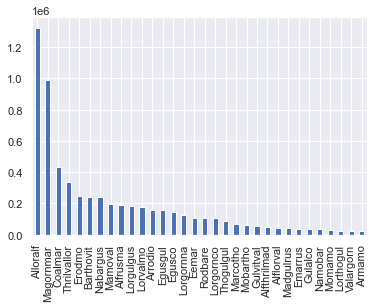

In [91]:
sellout['Store_State'].value_counts().plot.bar()

The State with more data in both the sellin and sellout dataframes is Alloralf, followed by Magornmar.

<AxesSubplot:>

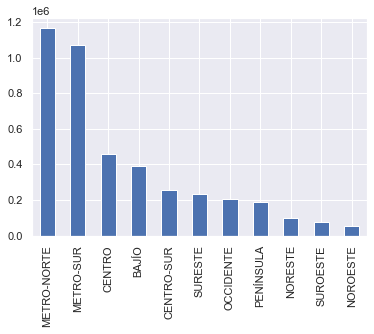

In [92]:
sellin['Store_Division'].value_counts().plot.bar()

<AxesSubplot:>

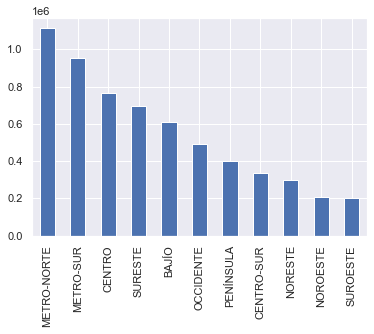

In [93]:
sellout['Store_Division'].value_counts().plot.bar()

The Divison with more data in both the sellin and sellout dataframes is METRO-NORTE, followed by METRO-SUR.

<AxesSubplot:>

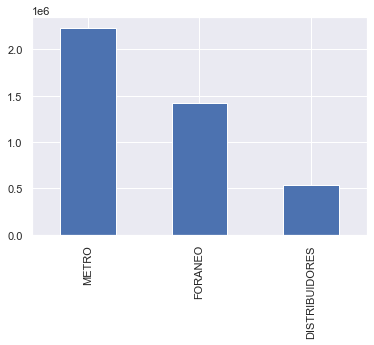

In [94]:
sellin['Store_Structure'].value_counts().plot.bar()

<AxesSubplot:>

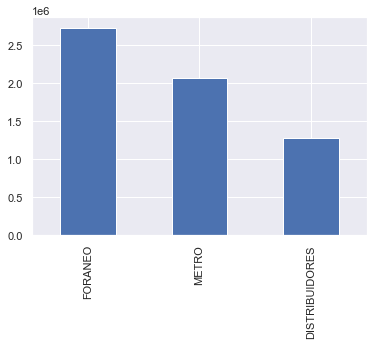

In [95]:
sellout['Store_Structure'].value_counts().plot.bar()

FORANEO is more common in the sellout dataframe, and METRO in the sellin.

### 4.4.2. Numeric features

#### 4.4.2.1. Sellin - Units & Price

In [96]:
sellin.describe()

,Sku,Store_Id,Units,Price,Margin,Store_Degree
count,4.188783e+06,4.188783e+06,4.188783e+06,4.188783e+06,4.188783e+06,4.188783e+06
mean,4.512631e+06,2.630262e+03,1.060644e+02,2.200475e+01,1.611745e+01,4.286833e+00
std,2.024671e+05,1.419556e+03,2.813257e+02,1.124575e+01,9.045261e+00,9.708575e-01
min,4.220015e+06,2.000000e+00,0.000000e+00,1.097000e+01,5.400000e+00,1.000000e+00
25%,4.351043e+06,1.569000e+03,1.100000e+01,1.331000e+01,9.560000e+00,4.000000e+00
50%,4.523924e+06,2.736000e+03,2.400000e+01,1.451000e+01,1.033000e+01,4.000000e+00
75%,4.709131e+06,3.793000e+03,7.200000e+01,3.577000e+01,2.693000e+01,5.000000e+00
max,4.829827e+06,5.855000e+03,3.600000e+04,4.780000e+01,3.915000e+01,6.000000e+00


<AxesSubplot:>

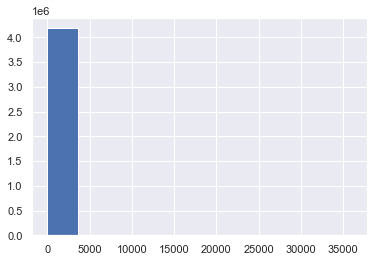

In [97]:
sellin['Units'].hist()

In [98]:
sellin['Units'].max()

36000

In [99]:
sellin['Store_Type'].loc[(sellin['Units']==36000)].unique()

array(['Shop'], dtype=object)

<AxesSubplot:>

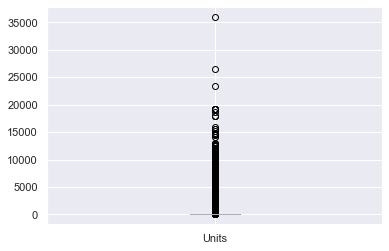

In [100]:
sellin.boxplot(column=['Units'])

We can use the IQR (interquartile range) method for identifying outliers. We take 1.5 times the IQR (Q3-Q1) and then subtract this value from Q1 (25th percentile) and add this value to Q3 (75th percentile). Any values that fall outside of this fence are considered outliers. If we take 3 times the IQR, they are considered extreme outliers.

In [101]:
# IQR method for identifying outliers
Q1 = sellin['Units'].quantile(0.25)
Q3 = sellin['Units'].quantile(0.75)
IQR = Q3-Q1

# Limits
lower_mild_limit = Q1 - 1.5*IQR
lower_extreme_limit = Q1 - 3*IQR
upper_mild_limit = Q3 + 1.5*IQR
upper_extreme_limit = Q3 + 3*IQR 

# Calculate the percentage of the outliers
lower_mild = round(len(sellin[sellin['Units']<lower_mild_limit])*100/len(sellin))
lower_extreme = round(len(sellin[sellin['Units']<lower_extreme_limit])*100/len(sellin))
upper_mild = round(len(sellin[sellin['Units']>upper_mild_limit])*100/len(sellin))
upper_extreme = round(len(sellin[sellin['Units']>upper_extreme_limit])*100/len(sellin))

print('extreme outliers - lower limit (%):', lower_extreme, '- upper limit (%):', upper_extreme)
print('mild outliers - lower limit (%):', lower_mild, '- upper limit (%):', upper_mild)

extreme outliers - lower limit (%): 0 - upper limit (%): 9
mild outliers - lower limit (%): 0 - upper limit (%): 14


14% of the data represents a mild outlier and 9% is an extreme outlier.

In [102]:
print('upper_mild_limit:', upper_mild_limit, '; upper_extreme_limit:', upper_extreme_limit)

upper_mild_limit: 163.5 ; upper_extreme_limit: 255.0


In [103]:
# For example, I could use the following criteria for removing outliers (this should be previously discussed): 
# removing the values that are 5 times above the upper extreme limit.

# sellin=sellin.loc[(sellin['Units']<5*upper_extreme_limit)]

Looking at the outliers in more detail:

In [104]:
for i in sellin.columns:
    print(i, ':', sellin[i].loc[(sellin['Units']>163.5)].nunique())

Sku : 31
Date : 757
Store_Id : 1474
Units : 1937
Price : 218
Margin : 351
Sku_Description : 31
Sku_Category : 2
Sku_Subcategory : 2
Store_Name : 1440
Store_Supplier : 2
Store_Type : 10
Store_City : 306
Store_State : 31
Store_Division : 11
Store_Distributor : 73
Store_Structure : 3
Store_Degree : 6


In [105]:
for i in sellin.columns:
    print(i, ':', sellin[i].loc[(sellin['Units']>255)].nunique())

Sku : 30
Date : 756
Store_Id : 1401
Units : 1845
Price : 195
Margin : 305
Sku_Description : 30
Sku_Category : 2
Sku_Subcategory : 2
Store_Name : 1372
Store_Supplier : 2
Store_Type : 10
Store_City : 304
Store_State : 31
Store_Division : 11
Store_Distributor : 73
Store_Structure : 3
Store_Degree : 6


There are 31 specific products that are the outliers (30 are considered mild outliers and 31 extreme). Let's see what are these 31 products:

In [106]:
sellin['Sku_Description'].loc[(sellin['Units']>163.5)].unique()

array(['Grain Chocolate', 'Crunchy Bran Mango Peach',
       'Chocos Mango Peach', 'Crisp Mango Peach', 'Muesli Chocolate',
       'Corn Chocolate Choc Chip', 'Stars Mango Peach',
       'Lucjy Charms Chocolate', 'Crunch Mango Peach',
       'Peanut Butter Chocolate Choc Chip', 'Chocos Chocolate Choc Chip',
       'Toast Mango Peach', 'Golden Goals Chocolate Choc Chip',
       'Crunch Life Chocolate', 'Crunchy Bran Chocolate Choc Chip',
       'Crunchy Nut Cornflakes Chocolate Choc Chip', 'Puffs Mango Peach',
       'Cups Mango Peach', 'Crunch Chocolate Choc Chip',
       'Fruit & Bran Chocolate Choc Chip', 'Cornflakes Mango Peach',
       'Fruit & Nut Chocolate Choc Chip', 'Graham Mango Peach',
       'Sugar Mango Peach', 'Cornflakes Chocolate Choc Chip',
       'Crunch Berries Mango Peach', 'Sugar Chocolate Choc Chip',
       'Stars Chocolate', 'Lucjy Charms Mango Peach',
       'Crispy Rice Chocolate Choc Chip',
       'Coco Poops Chocolate Choc Chip'], dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Units'>

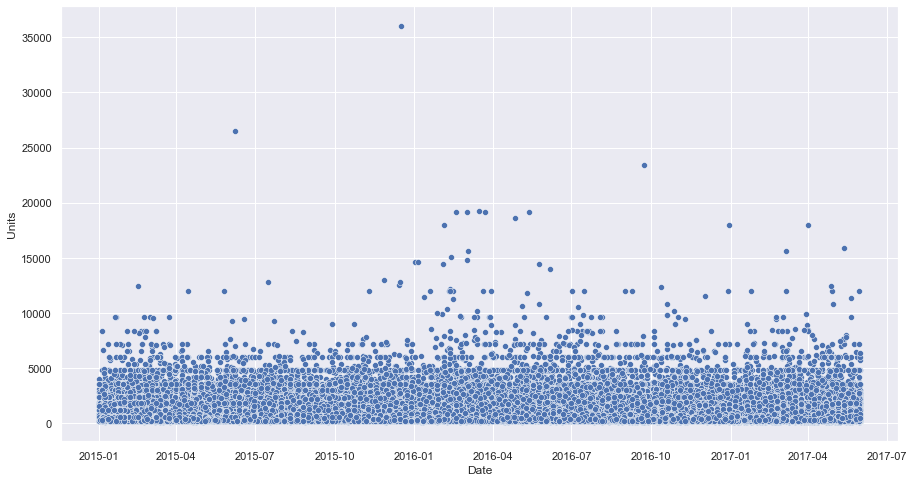

In [107]:
outliers_units = sellin.loc[(sellin['Units']>163.5)]

plt.figure(figsize=(15,8))
sns.scatterplot(x=outliers_units['Date'], y=outliers_units['Units'])

In [108]:
sellin['Sku_Category'].loc[(sellin['Units']>500)].value_counts()

Sugar-free       209892
Super-flavour      3572
Name: Sku_Category, dtype: int64

In [109]:
sellin['Sku_Subcategory'].loc[(sellin['Units']>500)].value_counts()

Cereal bars    209892
Cereal box       3572
Name: Sku_Subcategory, dtype: int64

In [110]:
sellin['Sku_Description'].loc[(sellin['Units']>500)].value_counts().head()

Crunchy Bran Mango Peach    62007
Chocos Mango Peach          53365
Lucjy Charms Chocolate      37483
Stars Mango Peach           18374
Muesli Chocolate            17910
Name: Sku_Description, dtype: int64

These are the products that retailers buy the most. They are mainly sugar-free cereal bars. Let's look at the seasonal trend:

<AxesSubplot:xlabel='Date', ylabel='Units'>

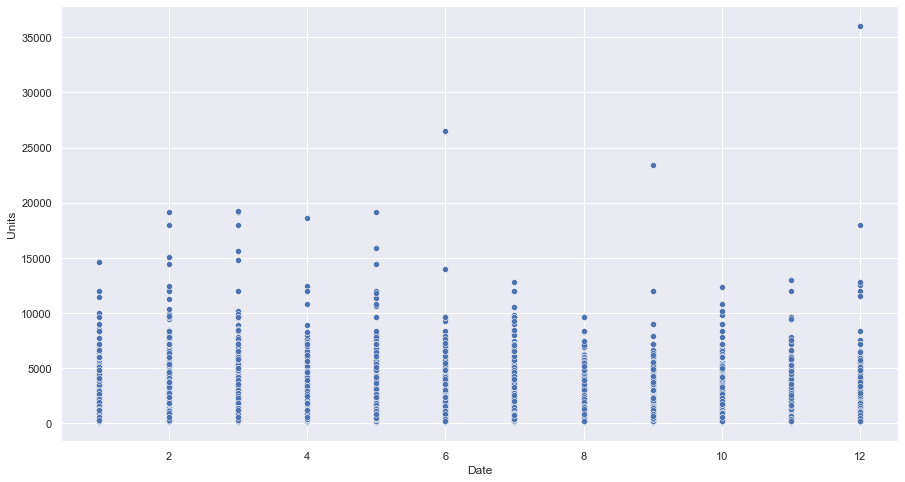

In [111]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=outliers_units.Date.dt.month, y=outliers_units['Units'])

There are 3 products that are highly sold in June, September, and December:

In [112]:
sellin.loc[(sellin['Units']>20000)]

,Sku,Date,Store_Id,Units,Price,Margin,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Store_Supplier,Store_Type,Store_City,Store_State,Store_Division,Store_Distributor,Store_Structure,Store_Degree
257987,4240039,2015-12-17,161,36000,14.51,10.78,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Kicking Aqua GipsyTrade,proveedor_1,Shop,Clean Blue Dirt,Magornmar,METRO-NORTE,Emolor Vocals,METRO,5
282166,4240039,2016-09-23,231,23400,14.51,10.23,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Awesome Pink BigCom,proveedor_1,Shop,Interesting Green Pine,Alloralf,METRO-SUR,Ioalfio Ifonforge Industries,METRO,4
2625031,4442378,2015-06-08,3356,26496,11.31,6.76,Crunchy Bran Mango Peach,Sugar-free,Cereal bars,Young Lavender Market,proveedor_2,Leftorium,Massive Sky Blue Hole,Alfrusma,OCCIDENTE,Lorlorval Gmbh,DISTRIBUIDORES,3


The product "Lucjy Charms Chocolate" is highly sold in December and September, while "Crunchy Bran Mango Peach" is highly sold in June. However, these products are not seasonal, since they are also sold along the year as we can see below:

In [113]:
sellin.loc[(sellin['Sku']==4240039)].groupby(sellin.Date.dt.month)['Units'].sum()

Date
1     6633910
2     5934116
3     6441973
4     6473296
5     6444409
6     4328275
7     4117214
8     4519871
9     4322704
10    4369387
11    4220319
12    4335108
Name: Units, dtype: int32

In [114]:
sellin.loc[(sellin['Sku']==4442378)].groupby(sellin.Date.dt.month)['Units'].sum()

Date
1      8890544
2      9904430
3     10519147
4     10607793
5     10545967
6      7010376
7      6805572
8      7145293
9      6961894
10     6983195
11     6301069
12     6421001
Name: Units, dtype: int32

Now, let's look at the outliers for the Price:

<AxesSubplot:>

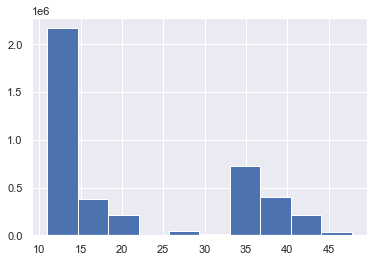

In [115]:
sellin['Price'].hist()

<AxesSubplot:>

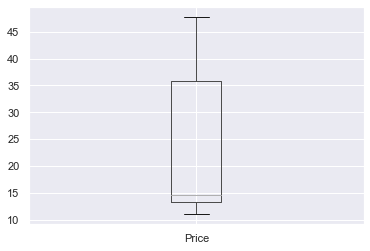

In [116]:
sellin.boxplot(column=['Price'])

The distribution of the price looks fine. There are not negative values neither outliers.

#### 4.4.2.2. Sellout - Units & Price

In [117]:
sellout.describe()

,Sku,Store_Id,Units,Price,Supplier,Store_Supplier,Store_Degree
count,6.067929e+06,6.067929e+06,6.067929e+06,4.862029e+06,6.067929e+06,6.067929e+06,6.067929e+06
mean,4.466227e+06,2.349009e+03,1.936061e+01,1.627344e+01,1.801267e+00,1.801073e+00,4.165927e+00
std,1.631190e+05,1.493841e+03,5.672735e+01,8.772739e+00,3.990469e-01,3.991928e-01,1.288300e+00
min,4.220015e+06,2.000000e+00,-6.750000e+02,-2.350000e+01,1.000000e+00,1.000000e+00,1.000000e+00
25%,4.300343e+06,1.147000e+03,1.000000e+00,1.050000e+01,2.000000e+00,2.000000e+00,3.000000e+00
50%,4.442378e+06,2.277000e+03,3.000000e+00,1.600000e+01,2.000000e+00,2.000000e+00,4.000000e+00
75%,4.615034e+06,3.643000e+03,1.300000e+01,1.760000e+01,2.000000e+00,2.000000e+00,5.000000e+00
max,4.829827e+06,5.855000e+03,1.935400e+04,1.850000e+02,2.000000e+00,2.000000e+00,6.000000e+00


<AxesSubplot:>

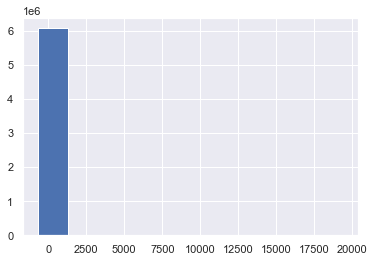

In [118]:
sellout['Units'].hist()

<AxesSubplot:>

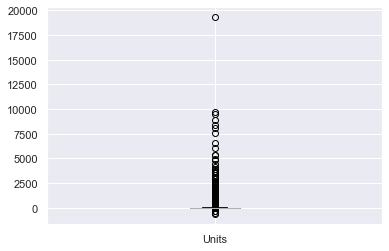

In [119]:
sellout.boxplot(column=['Units'])

There are negative units (it could be that they have been returned or stolen). We should ask this to the client. 

In [120]:
# IQR method for identifying outliers
Q1 = sellout['Units'].quantile(0.25)
Q3 = sellout['Units'].quantile(0.75)
IQR = Q3-Q1

# Limits
lower_mild_limit = Q1 - 1.5*IQR
lower_extreme_limit = Q1 - 3*IQR
upper_mild_limit = Q3 + 1.5*IQR
upper_extreme_limit = Q3 + 3*IQR 

# Calculate the percentage of the outliers
lower_mild = round(len(sellout[sellout['Units']<lower_mild_limit])*100/len(sellout))
lower_extreme = round(len(sellout[sellout['Units']<lower_extreme_limit])*100/len(sellout))
upper_mild = round(len(sellout[sellout['Units']>upper_mild_limit])*100/len(sellout))
upper_extreme = round(len(sellout[sellout['Units']>upper_extreme_limit])*100/len(sellout))

print('extreme outliers - lower limit (%):', lower_extreme, '- upper limit (%):', upper_extreme)
print('mild outliers - lower limit (%):', lower_mild, '- upper limit (%):', upper_mild)

extreme outliers - lower limit (%): 0 - upper limit (%): 9
mild outliers - lower limit (%): 0 - upper limit (%): 14


In [121]:
print('upper_mild_limit:', upper_mild_limit, '; upper_extreme_limit:', upper_extreme_limit)

upper_mild_limit: 31.0 ; upper_extreme_limit: 49.0


In [122]:
# For example, I could use the following criteria for removing outliers (this should be previously discussed): 
# removing the values that are 5 times above the upper extreme limit.

#sellout=sellout.loc[(sellout['Units']<5*upper_extreme_limit)]

Looking at the outliers in more detail:

In [123]:
for i in sellout.columns:
    print(i, ':', sellout[i].loc[(sellout['Units']>163.5)].nunique())

Sku : 28
Date : 397
Store_Id : 863
Units : 1369
Price : 742
Supplier : 2
Sku_Description : 28
Sku_Category : 2
Sku_Subcategory : 2
Store_Name : 850
Store_Supplier : 2
Store_Type : 8
Store_City : 327
Store_State : 30
Store_Division : 11
Store_Distributor : 73
Store_Structure : 3
Store_Degree : 6


In [124]:
for i in sellout.columns:
    print(i, ':', sellout[i].loc[(sellout['Units']>255)].nunique())

Sku : 22
Date : 397
Store_Id : 674
Units : 1277
Price : 628
Supplier : 2
Sku_Description : 22
Sku_Category : 2
Sku_Subcategory : 2
Store_Name : 666
Store_Supplier : 2
Store_Type : 8
Store_City : 247
Store_State : 23
Store_Division : 11
Store_Distributor : 60
Store_Structure : 3
Store_Degree : 6


There are 28 specific products that are the outliers (28 are considered mild outliers and 22 extreme). Let's see what are these 28 products:

In [125]:
sellout['Sku_Description'].loc[(sellout['Units']>31)].unique()

array(['Crisp Mango Peach', 'Crunchy Bran Mango Peach',
       'Peanut Butter Chocolate Choc Chip', 'Chocos Mango Peach',
       'Corn Chocolate Choc Chip', 'Muesli Chocolate',
       'Stars Mango Peach', 'Grain Chocolate', 'Lucjy Charms Chocolate',
       'Chocos Chocolate Choc Chip', 'Crunch Mango Peach',
       'Toast Mango Peach', 'Sugar Mango Peach', 'Graham Mango Peach',
       'Crunchy Bran Chocolate Choc Chip',
       'Crunchy Nut Cornflakes Chocolate Choc Chip',
       'Crunch Life Chocolate', 'Cornflakes Chocolate Choc Chip',
       'Fruit & Bran Chocolate Choc Chip', 'Frosted Chocolate Choc Chip',
       'Crispy Rice Mango Peach', 'Cornflakes Mango Peach',
       'Fruit & Nut Chocolate Choc Chip', 'Cups Mango Peach',
       'Lucjy Charms Mango Peach', 'Stars Chocolate', 'Puffs Mango Peach',
       'Crunch Chocolate Choc Chip', 'Sugar Chocolate Choc Chip',
       'Coco Poops Mango Peach', 'Crispy Rice Chocolate Choc Chip',
       'Squares Mango Peach', 'Nut Cheerios Chocolate

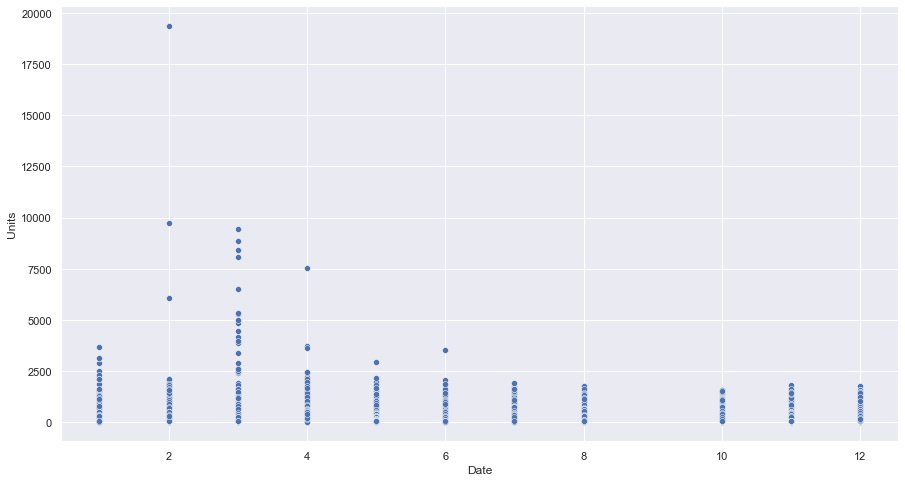

In [126]:
outliers_sellout = sellout.loc[(sellout['Units']>31)]

plt.figure(figsize=(15,8))
sns.scatterplot(x=outliers_sellout.Date.dt.month, y=outliers_sellout['Units'])
plt.show()

In [127]:
sellout['Sku_Category'].loc[(sellout['Units']>31)].value_counts()

Sugar-free       760725
Super-flavour     60786
Name: Sku_Category, dtype: int64

In [128]:
sellout['Sku_Subcategory'].loc[(sellout['Units']>31)].value_counts()

Cereal bars    760725
Cereal box      60786
Name: Sku_Subcategory, dtype: int64

In [129]:
sellout['Sku_Description'].loc[(sellout['Units']>31)].value_counts().head()

Crunchy Bran Mango Peach    185521
Chocos Mango Peach          157846
Lucjy Charms Chocolate      101300
Stars Mango Peach            87901
Muesli Chocolate             81010
Name: Sku_Description, dtype: int64

These are the products that retailers buy the most. They are mainly sugar-free cereal bars. Let's look at the seasonal trend:

There is a product highly sold in February:

In [130]:
sellout.loc[(sellout['Units']>17500)]

,Sku,Date,Store_Id,Units,Price,Supplier,Sku_Description,Sku_Category,Sku_Subcategory,Store_Name,Store_Supplier,Store_Type,Store_City,Store_State,Store_Division,Store_Distributor,Store_Structure,Store_Degree
738846,4240039,2017-02-21,231,19354,NaN,1,Lucjy Charms Chocolate,Sugar-free,Cereal bars,Awesome Pink BigCom,1,Shop,Interesting Green Pine,Alloralf,METRO-SUR,Ioalfio Ifonforge Industries,METRO,4


The product "Lucjy Charms Chocolate" is highly sold in February. However, it is not seasonal, since it is also sold along the year as we can see below:

In [131]:
sellout.loc[(sellout['Sku']==4240039)].groupby(sellout.Date.dt.month)['Units'].sum()

Date
1     2156042
2     2073899
3     2150054
4     2046281
5      353557
6       64474
7     1770431
8     1823211
10     255064
11    1747417
12    1868160
Name: Units, dtype: int32

Now, let's look at the outliers for the Price:

<AxesSubplot:>

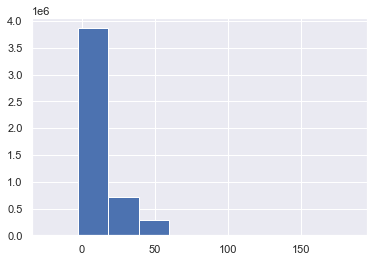

In [132]:
sellout['Price'].hist()

<AxesSubplot:>

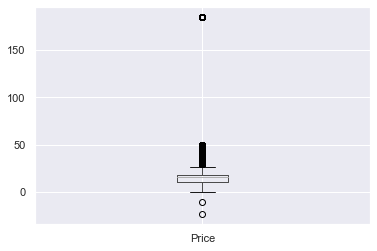

In [133]:
sellout.boxplot(column=['Price'])

In [134]:
# IQR method for identifying outliers
Q1 = sellout['Price'].quantile(0.25)
Q3 = sellout['Price'].quantile(0.75)
IQR = Q3-Q1

# Limits
lower_mild_limit = Q1 - 1.5*IQR
lower_extreme_limit = Q1 - 3*IQR
upper_mild_limit = Q3 + 1.5*IQR
upper_extreme_limit = Q3 + 3*IQR 

# Calculate the percentage of the outliers
lower_mild = round(len(sellout[sellout['Price']<lower_mild_limit])*100/len(sellout))
lower_extreme = round(len(sellout[sellout['Price']<lower_extreme_limit])*100/len(sellout))
upper_mild = round(len(sellout[sellout['Price']>upper_mild_limit])*100/len(sellout))
upper_extreme = round(len(sellout[sellout['Price']>upper_extreme_limit])*100/len(sellout))

print('extreme outliers - lower limit (%):', lower_extreme, '- upper limit (%):', upper_extreme)
print('mild outliers - lower limit (%):', lower_mild, '- upper limit (%):', upper_mild)

extreme outliers - lower limit (%): 0 - upper limit (%): 5
mild outliers - lower limit (%): 0 - upper limit (%): 5


In [135]:
print('upper_mild_limit:', round(upper_mild_limit,2), '; upper_extreme_limit:', round(upper_extreme_limit,2))

upper_mild_limit: 28.25 ; upper_extreme_limit: 38.9


In [136]:
# For example, I could use the following criteria for removing outliers (this should be previously discussed): 
# removing the values that are 5 times above the upper extreme limit.

#sellout=sellout.loc[(sellout['Price']<5*upper_extreme_limit)]

Looking at the outliers in more detail:

In [137]:
for i in sellout.columns:
    print(i, ':', sellout[i].loc[(sellout['Price']>28.25)].nunique())

Sku : 6
Date : 242
Store_Id : 1528
Units : 331
Price : 1376
Supplier : 1
Sku_Description : 6
Sku_Category : 1
Sku_Subcategory : 1
Store_Name : 1499
Store_Supplier : 2
Store_Type : 7
Store_City : 429
Store_State : 29
Store_Division : 11
Store_Distributor : 73
Store_Structure : 3
Store_Degree : 6


In [138]:
for i in sellout.columns:
    print(i, ':', sellout[i].loc[(sellout['Price']>38.9)].nunique())

Sku : 4
Date : 242
Store_Id : 1528
Units : 328
Price : 700
Supplier : 1
Sku_Description : 4
Sku_Category : 1
Sku_Subcategory : 1
Store_Name : 1499
Store_Supplier : 2
Store_Type : 7
Store_City : 429
Store_State : 29
Store_Division : 11
Store_Distributor : 73
Store_Structure : 3
Store_Degree : 6


There are 6 specific products that are the outliers (6 are considered mild outliers and 4 extreme). Let's see what are these 6 products:

In [139]:
sellout['Sku_Description'].loc[(sellout['Price']>31)].unique()

array(['Frosted Mango Peach', 'Puffs Mango Peach',
       'Sugar Chocolate Choc Chip', 'Peanut Butter Mango Peach',
       'Cups Mango Peach'], dtype=object)

<AxesSubplot:xlabel='Date', ylabel='Price'>

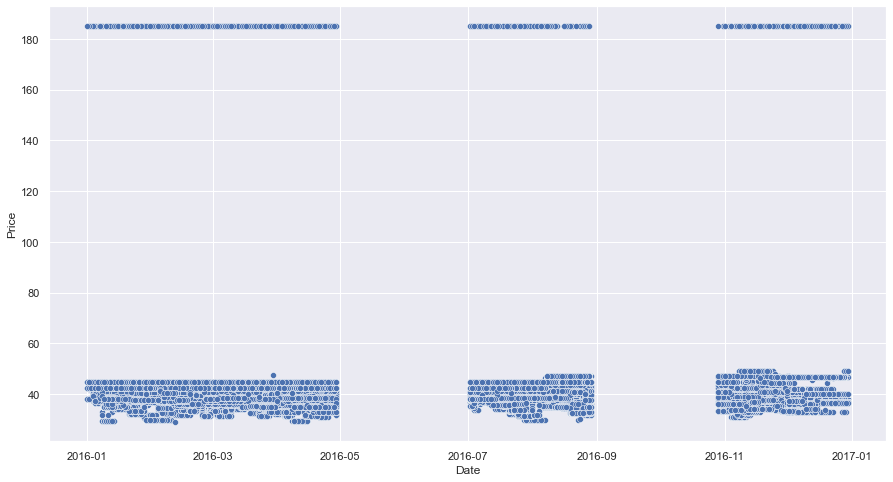

In [140]:
outliers_price = sellout.loc[(sellout['Price']>28.25)]

plt.figure(figsize=(15,8))
sns.scatterplot(x=outliers_price['Date'], y=outliers_price['Price'])

<AxesSubplot:xlabel='Date', ylabel='Price'>

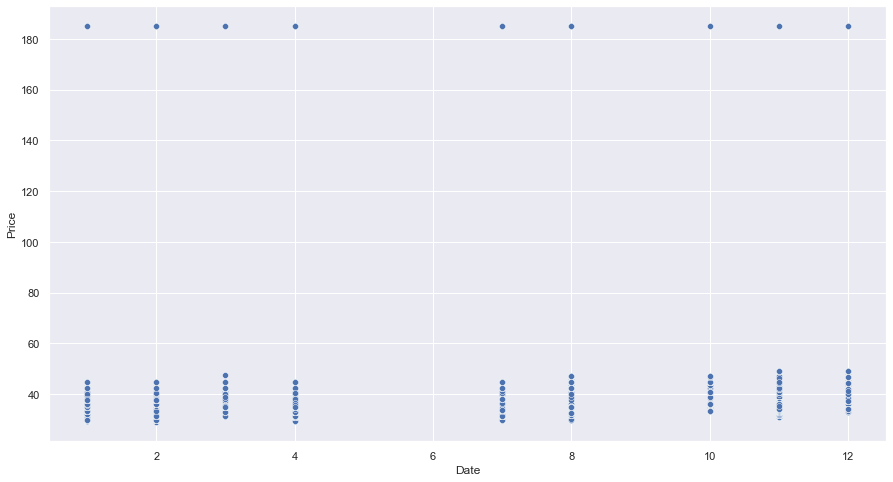

In [141]:
outliers_price = sellout.loc[(sellout['Price']>28.25)]

plt.figure(figsize=(15,8))
sns.scatterplot(x=outliers_price.Date.dt.month, y=outliers_price['Price'])

In [142]:
sellout['Sku_Description'].loc[(sellout['Price']>180)].unique()

array(['Peanut Butter Mango Peach'], dtype=object)

In [143]:
sellout['Sku_Category'].loc[(sellout['Price']>180)].unique()

array(['Super-flavour'], dtype=object)

In [144]:
sellout['Sku_Subcategory'].loc[(sellout['Price']>180)].unique()

array(['Cereal box'], dtype=object)

In [145]:
sellout['Sku'].loc[(sellout['Price']>180)].unique()

array([4371364], dtype=int64)

In [146]:
sellout['Price'].loc[(sellout['Sku']==4371364)].unique()

array([185.])

The product with the highest price is "Peanut Butter Mango Peach", a super-flavour cereal box. It is sold along the year (not seasonal) with the same price (185 $). This high value could be due to an error when typing the product price.

#### 4.4.2.3. Other numeric features - Supplier & Store_Degree

<AxesSubplot:>

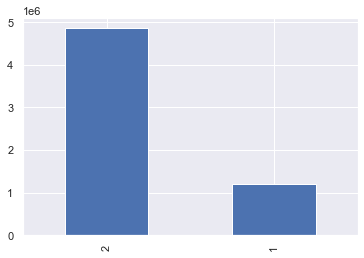

In [147]:
sellout['Supplier'].value_counts().plot.bar()

<AxesSubplot:>

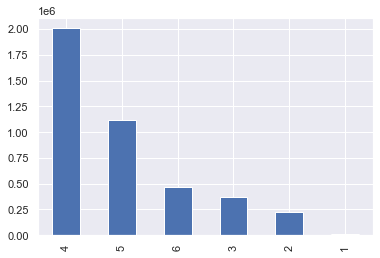

In [148]:
sellin['Store_Degree'].value_counts().plot.bar()

<AxesSubplot:>

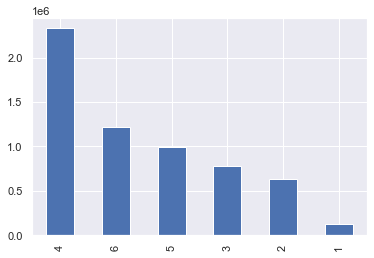

In [149]:
sellout['Store_Degree'].value_counts().plot.bar()

In both dataframes, sellin and sellout, Store_Degree = 1 is the less common, while 4 is the most repeated.

### 4.4.3. Date features

In [150]:
# Checking that the years, months, and days values are correct
print('sellin:')
print('years:', sorted(sellin['Date'].dt.year.unique()))
print('months:',sorted(sellin['Date'].dt.month.unique()))
print('days:',sorted(sellin['Date'].dt.day.unique()))
print('sellout:')
print('years:',sorted(sellout['Date'].dt.year.unique()))
print('months:',sorted(sellout['Date'].dt.month.unique()))
print('days:',sorted(sellout['Date'].dt.day.unique()))

sellin:
years: [2015, 2016, 2017]
months: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
days: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
sellout:
years: [2016, 2017]
months: [1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12]
days: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


<AxesSubplot:>

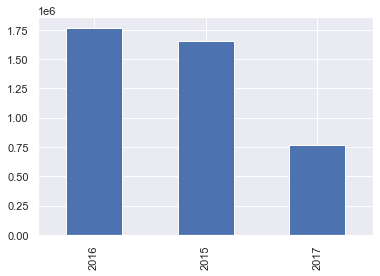

In [151]:
sellin['Date'].dt.year.value_counts().plot.bar()

<AxesSubplot:>

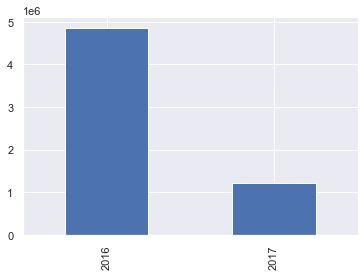

In [152]:
sellout['Date'].dt.year.value_counts().plot.bar()

<AxesSubplot:>

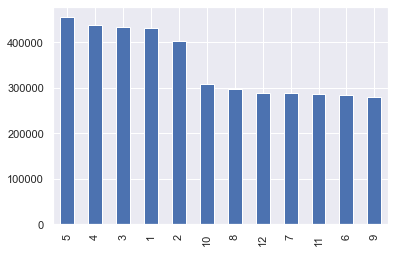

In [153]:
sellin['Date'].dt.month.value_counts().plot.bar()

<AxesSubplot:>

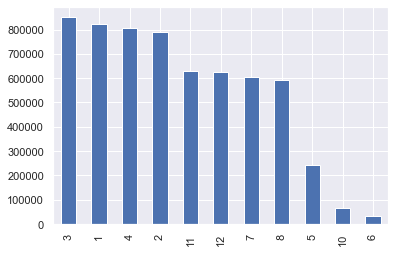

In [154]:
sellout['Date'].dt.month.value_counts().plot.bar()

<AxesSubplot:>

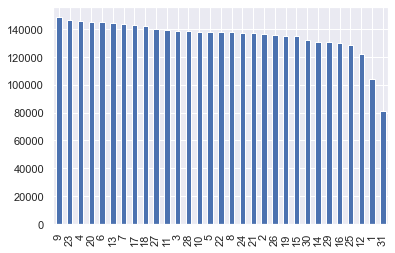

In [155]:
sellin['Date'].dt.day.value_counts().plot.bar()

<AxesSubplot:>

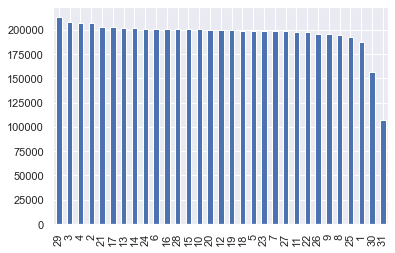

In [156]:
sellout['Date'].dt.day.value_counts().plot.bar()

# 5. Export final Data Structure to csv file format

In [157]:
print('final sellin:', sellin.shape)
print('final sellout:', sellout.shape)

final sellin: (4188783, 18)
final sellout: (6067929, 18)


In [158]:
# Saving in CSV format:

# sellin.to_csv('final_sellin.csv')
# sellout.to_csv('final_sellout.csv')

# 6. Exploratory Data Analysis - Data Visualizations 

To have a first intuition of the dataset, visualizations are used to answer to the following questions:
* What items do customers and retailers buy more often? Top ten products.
* Which are the products categories/subcategories that customers buy more often?
* Which type of shop sells more items and have a higher margin? Which supplier is most used?
* What year did people and retailers buy more?
* What month did people and retailers buy more?
* What day of the week do people and retailers buy more?

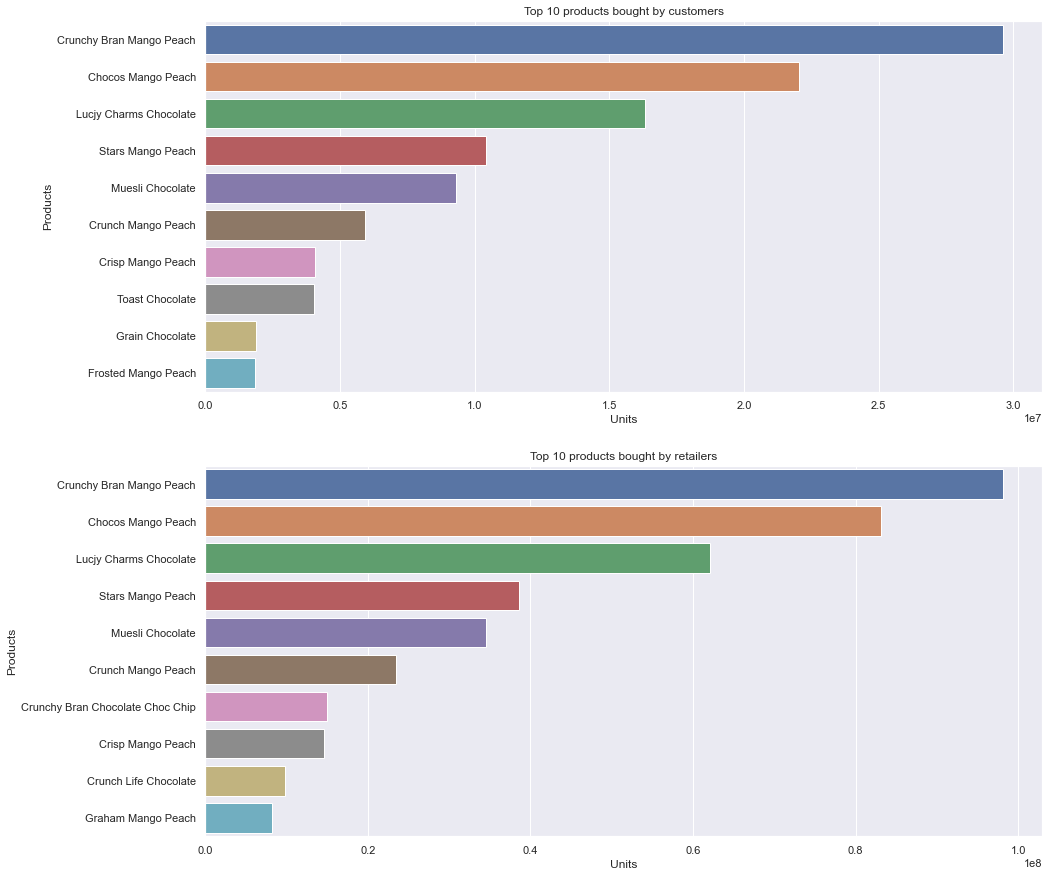

In [159]:
# What items do customers and retailers buy more often? Top ten products.

fig,ax = plt.subplots(2,1,figsize=(15, 15))

top10_sellout = sellout.groupby(['Sku_Description'])['Units'].sum().nlargest(10)
top10_sellin = sellin.groupby(['Sku_Description'])['Units'].sum().nlargest(10)

sns.barplot(y=top10_sellout.index,x=top10_sellout, ax=ax[0])
ax[0].set_title('Top 10 products bought by customers')
ax[0].set_ylabel("Products")
ax[0].set_xlabel("Units")

sns.barplot(y=top10_sellin.index, x=top10_sellin, ax=ax[1])
ax[1].set_title('Top 10 products bought by retailers')
ax[1].set_ylabel("Products")
ax[1].set_xlabel("Units")

plt.show()

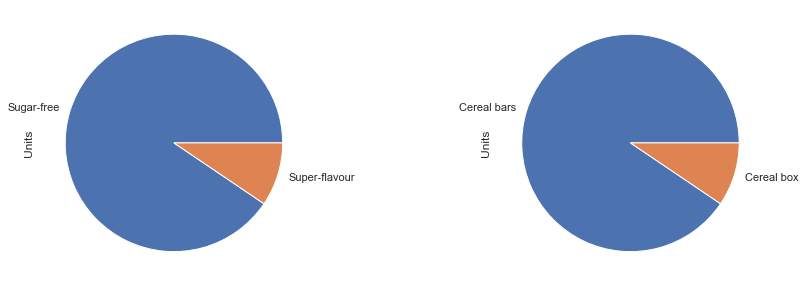

In [160]:
# Which are the products categories/subcategories that customers buy more often?

fig,ax = plt.subplots(1,2,figsize=(15, 5))

sellout.groupby(['Sku_Category'])['Units'].sum().plot(kind='pie', ax=ax[0])
sellout.groupby(['Sku_Subcategory'])['Units'].sum().plot(kind='pie', ax=ax[1])

plt.show()

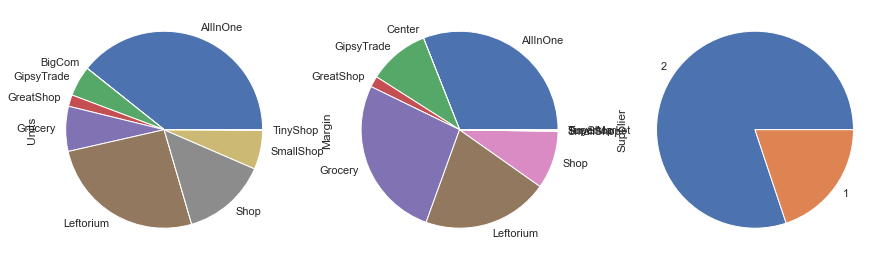

In [161]:
# Which type of shop sells more items and have a higher margin? Which supplier is most used?

fig,ax = plt.subplots(1,3,figsize=(15, 5))

sellout.groupby(['Store_Type'])['Units'].sum().plot(kind='pie', ax=ax[0])
sellin.groupby(['Store_Type'])['Margin'].sum().plot(kind='pie', ax=ax[1])
sellout['Supplier'].value_counts().plot(kind='pie', y='Counts', ax=ax[2])

plt.show()

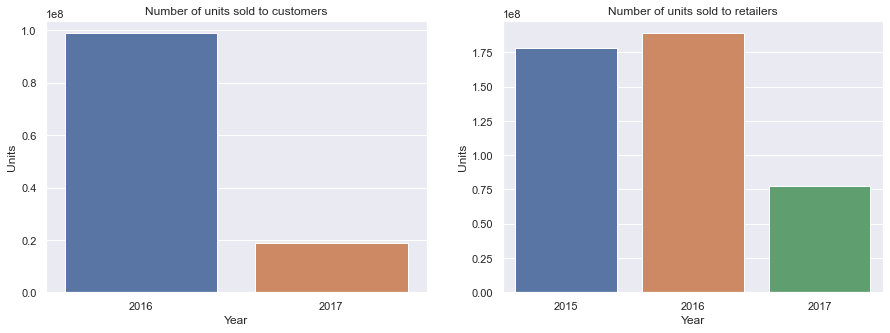

In [162]:
# What year did people and retailers buy more?

fig,ax = plt.subplots(1,2,figsize=(15, 5))

sellout_year = sellout.groupby(sellout.Date.dt.year)['Units'].sum()
sns.barplot(x=sellout_year.index, y=sellout_year, ax=ax[0])
ax[0].set_title('Number of units sold to customers')
ax[0].set_ylabel("Units")
ax[0].set_xlabel("Year")

sellin_year = sellin.groupby(sellin.Date.dt.year)['Units'].sum()
sns.barplot(x=sellin_year.index, y=sellin_year, ax=ax[1])
ax[1].set_title('Number of units sold to retailers')
ax[1].set_ylabel("Units")
ax[1].set_xlabel("Year")

plt.show()

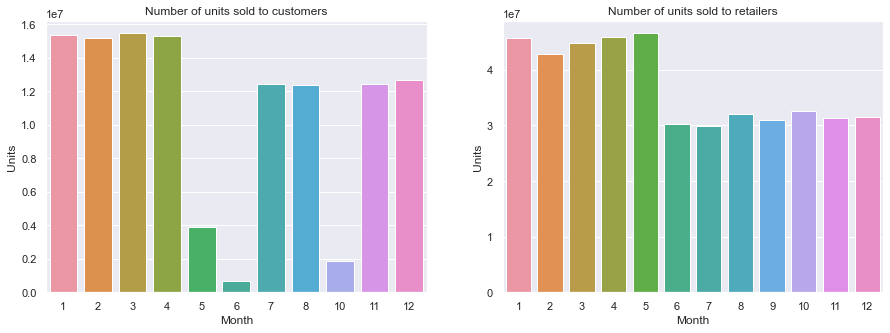

In [163]:
# What month did people and retailers buy more?

fig,ax = plt.subplots(1,2,figsize=(15, 5))

sellout_month = sellout.groupby(sellout.Date.dt.month)['Units'].sum()
sns.barplot(x=sellout_month.index, y=sellout_month, ax=ax[0])
ax[0].set_title('Number of units sold to customers')
ax[0].set_ylabel("Units")
ax[0].set_xlabel("Month")

sellin_month = sellin.groupby(sellin.Date.dt.month)['Units'].sum()
sns.barplot(x=sellin_month.index, y=sellin_month, ax=ax[1])
ax[1].set_title('Number of units sold to retailers')
ax[1].set_ylabel("Units")
ax[1].set_xlabel("Month")

plt.show()

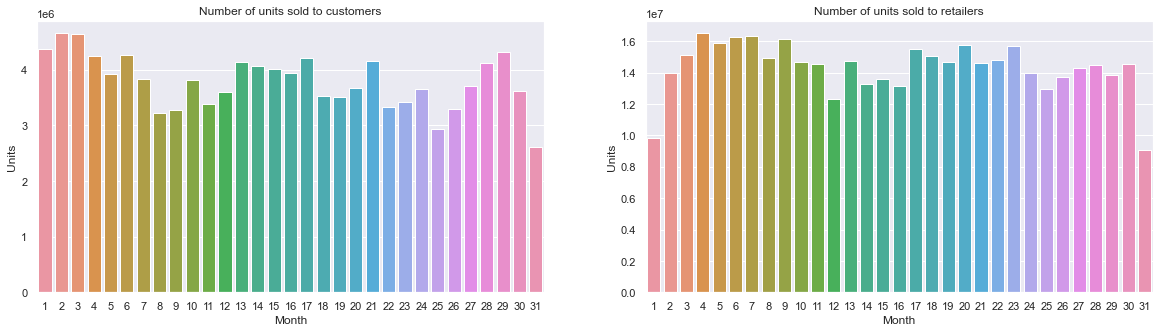

In [164]:
# What day of the week did people and retailers buy more?

fig,ax = plt.subplots(1,2,figsize=(20, 5))

sellout_day = sellout.groupby(sellout.Date.dt.day)['Units'].sum()
sns.barplot(x=sellout_day.index, y=sellout_day, ax=ax[0])
ax[0].set_title('Number of units sold to customers')
ax[0].set_ylabel("Units")
ax[0].set_xlabel("Month")

sellin_day = sellin.groupby(sellin.Date.dt.day)['Units'].sum()
sns.barplot(x=sellin_day.index, y=sellin_day, ax=ax[1])
ax[1].set_title('Number of units sold to retailers')
ax[1].set_ylabel("Units")
ax[1].set_xlabel("Month")

plt.show()

#### Final comments - future work:
* The two dataframes (sellin, sellout) could be combined into a single one.
* Discuss the criteria for removing outliers, remove them, and check the difference in the results.
* More plots could be done, for example, analyzing the sales (units * price) with interactive plots using the plotly library.